# Quais os principais motivos de avalia√ß√µes ruins e boas de diferentes gera√ß√µes do *smart speaker* Amazon Echo Dot?

Atrav√©s de t√©cnicas de minera√ß√£o e limpeza de dados, identifica√ß√£o de entidades nomeadas, an√°lise de sentimento e modelagem de t√≥picos, esse estudo visa encontrar os principais motivadores √† escrita de ruins e boas avalia√ß√µes

## Imports e setup


In [31]:
!pip install --upgrade ipykernel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 150.0/150.0 kB 8.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.6/1.6 MB 35.2 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel~=5.5.6, but you have ipykernel 6.22.0 which is incompatible.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.1 which is incompatible.


In [9]:
!pip install ntlk


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement ntlk (from versions: none)
ERROR: No matching distribution found for ntlk


In [10]:
!pip install wordcloud


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
!pip install langdetect


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 981.5/981.5 kB 37.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993243 sha256=0997c433f578a37525b94518fcdf94254c8e1fa5c88fc1b3ccdad5b0072ddc4a
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
!pip install spacy


You should consider upgrading via the 'c:\users\pbsba\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [15]:
!pip install spacy-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 190.7/190.7 kB 10.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.2/1.2 MB 36.4 MB/s eta 0:00:00


In [ ]:
!pip install svgling


You should consider upgrading via the 'c:\users\pbsba\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [12]:
!pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.0/7.0 MB 85.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 224.5/224.5 kB 15.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.8/7.8 MB 69.7 MB/s eta 0:00:00


In [ ]:
!pip install textblob


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\pbsba\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [ ]:
!pip install seaborn


In [ ]:
!pip install gensim

  Using cached gensim-4.3.1-cp38-cp38-win_amd64.whl (24.0 MB)


You should consider upgrading via the 'c:\users\pbsba\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [13]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.6/2.6 MB 44.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17.3/17.3 MB 72.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12.3/12.3 MB 55.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behav

In [1]:
import pandas as pd
import seaborn as sns
import os
import re
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt

from wordcloud import WordCloud

import nltk
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from langdetect import detect, LangDetectException

import spacy
import spacy_transformers
from spacy.tokens import Doc, Span, Token

from textblob import TextBlob

import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.utils import simple_preprocess
from gensim.models import Phrases
from gensim.corpora import Dictionary

import pyLDAvis
import pyLDAvis.gensim 


2023-05-02 04:18:35.433288: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-02 04:18:37.795674: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [17]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('maxent_ne_chunker')
nltk.download('words')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]  

True

In [18]:
!python - m spacy download en_core_web_trf


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Python 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> 
KeyboardInterrupt
>>> 
KeyboardInterrupt
>>> 
KeyboardInterrupt
>>> ^C


## Extra√ß√£o - Scraping


Os datasets usados nesse trabaho foram extra√≠dos diretamente do site da Amazon, com um scrapper escrito espec√≠ficamente para coletar dados das avalia√ß√µes dos clientes.

Os dados gerados pelo scrapper est√£o na subpasta `datasets`.

Cada arquivo corresponde √† um conjunto de p√°ginas diferente.

A Amazon limita o n√∫mero de p√°ginas de reviews dispon√≠veis para visualiza√ß√£o em 500, mas oferece tr√™s categorias de p√°ginas: "Geral", "Avalia√ß√µes positivas" e "Avalia√ß√µes cr√≠ticas". Para cada categoria, pode-se ter at√© 500 p√°ginas. Muitas vezes, h√° duplicidade entre os coment√°rios de cada categoria

O scrapper minera os dados de todas as categorias

In [2]:
!pip install gh-folder-download

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 312.5/312.5 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 856.7/856.7 kB 49.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 237.5/237.5 kB 27.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 51.1/51.1 kB 7.5 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=9959f58ff90054fd11b2663b7d302b188dd0283fd7da52edc8d288a5899f2309
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae20

In [6]:
!gh-folder-download --url https://github.com/pbacellar/NLP/tree/main/datasets

datasets/critical_Echo_4th_Gen_With_premium_sound_smart_home_hub_and_Alexa_20230
430211235.csv


datasets/critical_Echo_Dot_5th_Gen_2022_release_With_bigger_vibrant_sound_helpfu
l_routines_and_Alexa_20230430211235.csv

datasets/critical_Echo_Dot_5th_Gen_2022_release_with_clock_Smart_speaker_with_cl
ock_and_Alexa_20230430211235.csv

datasets/general_Echo_4th_Gen_With_premium_sound_smart_home_hub_and_Alexa_202304
30211235.csv


datasets/general_Echo_Dot_5th_Gen_2022_release_With_bigger_vibrant_sound_helpful
_routines_and_Alexa_20230430211235.csv

datasets/general_Echo_Dot_5th_Gen_2022_release_with_clock_Smart_speaker_with_clo
ck_and_Alexa_20230430211235.csv

datasets/positive_Echo_4th_Gen_With_premium_sound_smart_home_hub_and_Alexa_20230
430211235.csv


datasets/positive_Echo_Dot_5th_Gen_2022_release_With_bigger_vibrant_sound_helpfu
l_routines_and_Alexa_20230430211235.csv

datasets/positive_Echo_Dot_5th_Gen_2022_release_with_clock_Smart_speaker_with_cl
ock_and_Alexa_20230430211235.csv



In [20]:
! curl https://raw.githubusercontent.com/pbacellar/NLP/main/scraper.py --output scraper.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13089  100 13089    0     0   456k      0 --:--:-- --:--:-- --:--:--  456k


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Leitura e pr√©-processamento


In [204]:
orig_dfs = []
for dirpath, dirnames, filenames in os.walk("datasets"):
    for filename in filenames:
        # , names=cols))
        orig_df = pd.read_csv(open(f"{dirpath}/{filename}", "r"), encoding="utf-8")
        orig_df["orig_type"] = filename.split("_")[0]
        
        orig_dfs.append(orig_df)

orig_df = pd.concat(orig_dfs)
orig_df.reset_index(inplace=True, drop=True)
orig_df = orig_df.sample(frac=1)
orig_df.head()


product_name  base_price   
23942                     Echo_Dot_3rd_Gen_2018_Charcoal       22.92  \
23096                     Echo_Dot_3rd_Gen_2018_Charcoal       22.92   
28432  Echo_Dot_5th_Gen_2022_release_With_bigger_vibr...       29.99   
9758   Echo_4th_Gen_With_premium_sound_smart_home_hub...       61.76   
27374  Echo_Dot_5th_Gen_2022_release_With_bigger_vibr...       29.99   

       config_price  bundle_price           names               stars   
23942         15.06         59.98             NaN                 NaN  \
23096         15.06         59.98  Karimeriossss   5.0 out of 5 stars   
28432           NaN           NaN             NaN                 NaN   
9758            NaN           NaN      Penang1970  5.0 out of 5 stars   
27374           NaN           NaN   Tyrell  singh  4.0 out of 5 stars   

                                                   dates   
23942                                                NaN  \
23096  Reviewed in the United States \U0001f1fa\U0001...   
28432                                                NaN   
9758   Reviewed in the United States \U0001f1fa\U0001...   
27374  Reviewed in the United States \U0001f1fa\U0001...   

                             titles   
23942                        Useful  \
23096       I bought this as a gift   
28432                    Great buy!   
9758                I Love Alexa!!!   
27374  Good deal and happy lighting   

                                                 reviews   
23942                                                NaN  \
23096  \nThis is a great gift for someone who loves t...   
28432                                                NaN   
9758   \nI traded in my 1st Generation Echo for the n...   
27374  \nOnly downfall with Alexa is it seems like th...   

                            helpfuls   
23942                            NaN  \
23096  One person found this helpful   
28432                            NaN   
9758                             NaN   
27374                            NaN   

                                    config_color orig_type  
23942                                        NaN   general  
23096                 Configuration: Device only   general  
28432                                        NaN  positive  
9758     Color: Glacier WhiteConfiguration: Echo  positive  
27374  Color: CharcoalConfiguration: Device only  positive

In [205]:
def check_if_soft_na(x):
    try:
        return x in ['', 0]
    except TypeError:
        return False


def print_df_info(df):
    print(f"{'NAME':^15} {'UNIQ_COUNT':^15} {'NA_COUNT':^15} {'SOFT_NA_COUNT':^15} {'DTYPE':^15}")
    for col in df.columns:
        print(
            f"{col:<15} {len(df[col].unique()):^15} {df[col].isna().sum():^15} {df[col].map(check_if_soft_na).sum():^15} {df[col].dtype.name:^15}")
    print()
    print("SHAPE:", df.shape)
    print("DUPLICATES:", df.duplicated().sum())


print_df_info(orig_df)


     NAME         UNIQ_COUNT       NA_COUNT      SOFT_NA_COUNT       DTYPE     
product_name           4               0               0            object     
base_price             4               0               0            float64    
config_price           2             24446             0            float64    
bundle_price           2             24446             0            float64    
names                18774           2736              0            object     
stars                  6             2751              0            object     
dates                1348            2732              0            object     
titles               17935           2764              0            object     
reviews              22253           2886              0            object     
helpfuls              96             36262             0            object     
config_color          28             3465              0            object     
orig_type              3               0

Boa parte dos registos n√£o tem avalia√ß√µes


In [206]:
orig_df.groupby("product_name")["product_name"].count()


product_name
Echo_4th_Gen_With_premium_sound_smart_home_hub_and_Alexa                              13858
Echo_Dot_3rd_Gen_2018_Charcoal                                                        16041
Echo_Dot_5th_Gen_2022_release_With_bigger_vibrant_sound_helpful_routines_and_Alexa     6512
Echo_Dot_5th_Gen_2022_release_with_clock_Smart_speaker_with_clock_and_Alexa            4076
Name: product_name, dtype: int64

In [207]:
orig_df.groupby("orig_type")["orig_type"].count()


orig_type
critical     9527
general     15982
positive    14978
Name: orig_type, dtype: int64

### Limpeza b√°sica


#### Primeira rodada: filtrando apenas os que tem avalia√ß√µes √∫nicas


In [208]:
df_filetered = orig_df[~orig_df["reviews"].duplicated()]
print_df_info(df_filetered)


     NAME         UNIQ_COUNT       NA_COUNT      SOFT_NA_COUNT       DTYPE     
product_name           4               0               0            object     
base_price             4               0               0            float64    
config_price           2             12586             0            float64    
bundle_price           2             12586             0            float64    
names                18195             3               0            object     
stars                  6              19               0            object     
dates                1347              1               0            object     
titles               16369           1167              0            object     
reviews              22253             1               0            object     
helpfuls              85             19839             0            object     
config_color          28              421              0            object     
orig_type              3               0

Lidando com NaNs no campo reviews


In [209]:
df_filetered = df_filetered[~df_filetered["reviews"].isna()]
print_df_info(df_filetered)


     NAME         UNIQ_COUNT       NA_COUNT      SOFT_NA_COUNT       DTYPE     
product_name           4               0               0            object     
base_price             4               0               0            float64    
config_price           2             12586             0            float64    
bundle_price           2             12586             0            float64    
names                18195             2               0            object     
stars                  6              18               0            object     
dates                1346              0               0            object     
titles               16369           1167              0            object     
reviews              22252             0               0            object     
helpfuls              85             19838             0            object     
config_color          28              420              0            object     
orig_type              3               0

E os outros NaNs?


#### Segunda rodada: limpeza completa


Olhando para uma amostra, logo se v√™ uma s√©rie de "sujeiras", como NaNs e caract√©res especiais


In [323]:
df_filetered.head(10)


product_name  base_price   
23096                     Echo_Dot_3rd_Gen_2018_Charcoal       22.92  \
9758   Echo_4th_Gen_With_premium_sound_smart_home_hub...       61.76   
27374  Echo_Dot_5th_Gen_2022_release_With_bigger_vibr...       29.99   
37385  Echo_4th_Gen_With_premium_sound_smart_home_hub...       61.76   
21678                     Echo_Dot_3rd_Gen_2018_Charcoal       22.92   
4344                      Echo_Dot_3rd_Gen_2018_Charcoal       22.92   
37149  Echo_4th_Gen_With_premium_sound_smart_home_hub...       61.76   
39625  Echo_4th_Gen_With_premium_sound_smart_home_hub...       61.76   
14710  Echo_Dot_5th_Gen_2022_release_with_clock_Smart...       39.99   
15721  Echo_Dot_5th_Gen_2022_release_with_clock_Smart...       39.99   

       config_price  bundle_price           names               stars   
23096         15.06         59.98  Karimeriossss   5.0 out of 5 stars  \
9758            NaN           NaN      Penang1970  5.0 out of 5 stars   
27374           NaN           NaN   Tyrell  singh  4.0 out of 5 stars   
37385           NaN           NaN     Jim Tellier  3.0 out of 5 stars   
21678         15.06         59.98    Marilyn Hupp  5.0 out of 5 stars   
4344          15.06         59.98     Jacob Perry  4.0 out of 5 stars   
37149           NaN           NaN              HT  3.0 out of 5 stars   
39625           NaN           NaN    confidential  1.0 out of 5 stars   
14710           NaN           NaN         VANESSA  5.0 out of 5 stars   
15721           NaN           NaN    keychain joe  5.0 out of 5 stars   

                                                   dates   
23096  Reviewed in the United States \U0001f1fa\U0001...  \
9758   Reviewed in the United States \U0001f1fa\U0001...   
27374  Reviewed in the United States \U0001f1fa\U0001...   
37385  Reviewed in the United States \U0001f1fa\U0001...   
21678  Reviewed in the United States \U0001f1fa\U0001...   
4344   Reviewed in the United States \U0001f1fa\U0001...   
37149  Reviewed in the United States \U0001f1fa\U0001...   
39625  Reviewed in the United States \U0001f1fa\U0001...   
14710  Reviewed in the United States \U0001f1fa\U0001...   
15721  Reviewed in the United States \U0001f1fa\U0001...   

                                                  titles   
23096                            I bought this as a gift  \
9758                                     I Love Alexa!!!   
27374                       Good deal and happy lighting   
37385                                      Helllloooooo?   
21678                                   Reasonable Alexa   
4344         There\u2019s good and bad, but mostly good.   
37149  No significant difference from previous versio...   
39625                           Returning hard to set up   
14710                               Buena compa\xf1\xeda   
15721                                         Love it !!   

                                                 reviews   
23096  \nThis is a great gift for someone who loves t...  \
9758   \nI traded in my 1st Generation Echo for the n...   
27374  \nOnly downfall with Alexa is it seems like th...   
37385  \nThe microphone sensitivity of this model is ...   
21678  \nI love the echo dot I have an echo show but ...   
4344   \nIf you\u2019ve got a lot of smart devices, t...   
37149  \nI love Alexa and own multiple Good evening. ...   
39625            \nHard to set up can't figure it out.\n   
14710  \n\n\n\n\n                    The media could ...   
15721  \nLove this 5th Generation with the clock, and...   

                            helpfuls   
23096  One person found this helpful  \
9758                             NaN   
27374                            NaN   
37385                            NaN   
21678                            NaN   
4344                             NaN   
37149                            NaN   
39625                            NaN   
14710    2 people found this helpful   
15721                            NaN   

                       

Que outros car√°cteres especiais aparecem? Al√©m do \n


In [324]:
df_filetered.loc[9]["dates"]


'Reviewed in the United States \\U0001f1fa\\U0001f1f8 on January 6, 2023'

Vamos limpar

- C√≥digos unicode e car√°cteres especiais, como \n
- "3.0 out of 5 stars" nas stars. Queremos s√≥ o n√∫mero
- A coluna date cont√©m informa√ß√µes de localiza√ß√£o e de data e precisa ser quebrada
- A coluna config_color cont√©m informa√ß√µes da cor e da configura√ß√£o e precisa ser quebrada
- A coluna helpful cont√©m texto al√©m do n√∫mero de estrelas


In [325]:
def decode_unicode_codes(s):
    return str(s).encode('utf-8').decode('unicode-escape')


def convert_datestr_to_date(date_str):
    try:
        return datetime.strptime(re.sub("^(.* )on (.*)$", r"\g<2>", date_str), "%B %d, %Y")
    except TypeError:
        pass


def extract_country(country_str):
    try:
        return re.sub("Reviewed in the (.*) on.*$", r"\g<1>", country_str)
    except TypeError:
        pass


def extract_stars_count(starts_str):
    try:
        return int(float(re.sub("^(.*) out.*$", r"\g<1>", starts_str)))
    except TypeError:
        pass
    # except ValueError:
        # return 0


def extract_helpful_count(helpful_str):
    try:
        return int(re.sub("^([0-9]+|One).*$", r"\g<1>", helpful_str).replace("One", "1"))
    except TypeError:
        return 0


In [326]:
df = df_filetered.copy()
print(df.shape)

# fillnas
df["config_price"] = df["config_price"].fillna(0)
df["bundle_price"] = df["bundle_price"].fillna(0)
df["helpfuls"] = df["helpfuls"].fillna(0)
# df["config_color"] = df["config_color"].fillna("")
# df["titles"] = df["titles"].fillna("")
# df["stars"] = df["stars"].fillna("")

# transform contents
df['reviews'] = df['reviews'].str.replace(r"\n", "").map(decode_unicode_codes)
df['names'] = df['names'].map(decode_unicode_codes)
df['titles'] = df['titles'].map(decode_unicode_codes)
df['country'] = df['dates'].map(decode_unicode_codes).map(extract_country)
df['dates'] = df['dates'].map(convert_datestr_to_date)
df['stars'] = df['stars'].map(extract_stars_count)
df['helpfuls'] = df['helpfuls'].map(extract_helpful_count)
df['configuration'] = df['config_color'].str.replace(
    r"^(.*Configuration: )(.*)$", r"\g<2>")
df['color'] = df['config_color'].str.replace(
    r"^(.*Color: )(.*)(Configuration.*)$", r"\g<2>")


# convert to int
df["stars"] = df["stars"].convert_dtypes(convert_integer=True)
df["helpfuls"] = df["helpfuls"].convert_dtypes(convert_integer=True)

# reorder columns
new_cols = ["dates", "country", "product_name","orig_type", "configuration",  "color", "base_price",
            "config_price", "bundle_price", "names", "titles", "reviews", "stars", "helpfuls"]
df = df[new_cols]

df


(22252, 12)


dates           country   
23096 2023-01-12  United States üá∫üá∏  \
9758  2021-12-03  United States üá∫üá∏   
27374 2022-12-29  United States üá∫üá∏   
37385 2021-04-06  United States üá∫üá∏   
21678 2023-02-27  United States üá∫üá∏   
...          ...               ...   
37485 2021-11-02  United States üá∫üá∏   
37482 2021-12-09  United States üá∫üá∏   
37989 2021-12-11  United States üá∫üá∏   
32944 2020-02-04  United States üá∫üá∏   
13820 2023-02-19  United States üá∫üá∏   

                                            product_name orig_type   
23096                     Echo_Dot_3rd_Gen_2018_Charcoal   general  \
9758   Echo_4th_Gen_With_premium_sound_smart_home_hub...  positive   
27374  Echo_Dot_5th_Gen_2022_release_With_bigger_vibr...  positive   
37385  Echo_4th_Gen_With_premium_sound_smart_home_hub...  critical   
21678                     Echo_Dot_3rd_Gen_2018_Charcoal   general   
...                                                  ...       ...   
37485  Echo_4th_Gen_With_premium_sound_smart_home_hub...  critical   
37482  Echo_4th_Gen_With_premium_sound_smart_home_hub...  critical   
37989  Echo_4th_Gen_With_premium_sound_smart_home_hub...  critical   
32944                     Echo_Dot_3rd_Gen_2018_Charcoal  critical   
13820  Echo_Dot_5th_Gen_2022_release_With_bigger_vibr...   general   

                                        configuration   
23096                      Configuration: Device only  \
9758          Color: Glacier WhiteConfiguration: Echo   
27374       Color: CharcoalConfiguration: Device only   
37385              Color: CharcoalConfiguration: Echo   
21678                      Configuration: Device only   
...                                               ...   
37485              Color: CharcoalConfiguration: Echo   
37482         Color: Twilight BlueConfiguration: Echo   
37989              Color: CharcoalConfiguration: Echo   
32944                      Configuration: Device only   
13820  Color: Deep Sea BlueConfiguration: Device only   

                                                color  base_price   
23096                      Configuration: Device only       22.92  \
9758          Color: Glacier WhiteConfiguration: Echo       61.76   
27374       Color: CharcoalConfiguration: Device only       29.99   
37385              Color: CharcoalConfiguration: Echo       61.76   
21678                      Configuration: Device only       22.92   
...                                               ...         ...   
37485              Color: CharcoalConfiguration: Echo       61.76   
37482         Color: Twilight BlueConfiguration: Echo       61.76   
37989              Color: CharcoalConfiguration: Echo       61.76   
32944                      Configuration: Device only       22.92   
13820  Color: Deep Sea BlueConfiguration: Device only       29.99   

       config_price  bundle_price              names   
23096         15.06         59.98     Karimeriossss   \
9758           0.00          0.00         Penang1970   
27374          0.00          0.00      Tyrell  singh   
37385          0.00          0.00        Jim Tellier   
21678         15.06         59.98       Marilyn Hupp   
...             ...           ...                ...   
37485          0.00          0.00      Outta Control   
37482          0.00          0.00     Paula Connolly   
37989          0.00          0.00      Krishna Kumar   
32944         15.06         59.98                GSA   
13820          0.00          0.00  AfricanBettyyPoop   

                                           titles   
23096                     I bought this as a gift  \
9758                              I Love Alexa!!!   
27374                Good deal and happy lighting   
37385                               Helllloooooo?   
21678                            Reasonable Alexa   
...                                           ...   
37485  Not anywhere near as good as the last Echo   
37482                        Difficult con

In [327]:
print_df_info(orig_df)
print()
print_df_info(df)


     NAME         UNIQ_COUNT       NA_COUNT      SOFT_NA_COUNT       DTYPE     
product_name           4               0               0            object     
base_price             4               0               0            float64    
config_price           2             24446             0            float64    
bundle_price           2             24446             0            float64    
names                18774           2736              0            object     
stars                  6             2751              0            object     
dates                1348            2732              0            object     
titles               17935           2764              0            object     
reviews              22253           2886              0            object     
helpfuls              96             36262             0            object     
config_color          28             3465              0            object     
orig_type              3               0

Ainda sobraram muitos registos. Qual o tamanho do corpus?


In [328]:
df['reviews'].map(len).sum()


6043187

Mais de milh√£o de palvras!


### Downsampling


Para manter o processamento r√°pido, vamos trabalhar com sub-amostras de avalia√ß√µes cada produto


In [329]:
print(df.groupby("product_name")["product_name"].count())
print()
print(df.groupby("orig_type")["orig_type"].count())


product_name
Echo_4th_Gen_With_premium_sound_smart_home_hub_and_Alexa                              8118
Echo_Dot_3rd_Gen_2018_Charcoal                                                        9666
Echo_Dot_5th_Gen_2022_release_With_bigger_vibrant_sound_helpful_routines_and_Alexa    2751
Echo_Dot_5th_Gen_2022_release_with_clock_Smart_speaker_with_clock_and_Alexa           1717
Name: product_name, dtype: int64

orig_type
critical    8217
general     7072
positive    6963
Name: orig_type, dtype: int64


In [330]:
def downsample_df_to_n_rows(df, n):
    df = df.groupby("product_name").head(n)
    print(df.groupby("product_name")["product_name"].count())
    print()
    print(df.groupby("orig_type")["orig_type"].count())
    return df


In [331]:
df = downsample_df_to_n_rows(df, 1000)


product_name
Echo_4th_Gen_With_premium_sound_smart_home_hub_and_Alexa                              1000
Echo_Dot_3rd_Gen_2018_Charcoal                                                        1000
Echo_Dot_5th_Gen_2022_release_With_bigger_vibrant_sound_helpful_routines_and_Alexa    1000
Echo_Dot_5th_Gen_2022_release_with_clock_Smart_speaker_with_clock_and_Alexa           1000
Name: product_name, dtype: int64

orig_type
critical     781
general     1750
positive    1469
Name: orig_type, dtype: int64


In [332]:
df['reviews'].map(len).sum()


965534

### Idioma


#### Identificando o idioma


In [333]:
try:
    df.insert(df.columns.get_loc("titles")+1, "title_lang", "")
    df.insert(df.columns.get_loc("reviews")+1, "review_lang", "")
except ValueError:
    ...


def f(s):
    try:
        return detect(s)
    except LangDetectException:
        return "NO_LANG"


df["title_lang"] = df["titles"].map(f)
df["review_lang"] = df["reviews"].map(f)
df.head()


/tmp/ipykernel_7146/931494984.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["title_lang"] = df["titles"].map(f)
/tmp/ipykernel_7146/931494984.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review_lang"] = df["reviews"].map(f)


dates           country   
23096 2023-01-12  United States üá∫üá∏  \
9758  2021-12-03  United States üá∫üá∏   
27374 2022-12-29  United States üá∫üá∏   
37385 2021-04-06  United States üá∫üá∏   
21678 2023-02-27  United States üá∫üá∏   

                                            product_name orig_type   
23096                     Echo_Dot_3rd_Gen_2018_Charcoal   general  \
9758   Echo_4th_Gen_With_premium_sound_smart_home_hub...  positive   
27374  Echo_Dot_5th_Gen_2022_release_With_bigger_vibr...  positive   
37385  Echo_4th_Gen_With_premium_sound_smart_home_hub...  critical   
21678                     Echo_Dot_3rd_Gen_2018_Charcoal   general   

                                   configuration   
23096                 Configuration: Device only  \
9758     Color: Glacier WhiteConfiguration: Echo   
27374  Color: CharcoalConfiguration: Device only   
37385         Color: CharcoalConfiguration: Echo   
21678                 Configuration: Device only   

                                           color  base_price  config_price   
23096                 Configuration: Device only       22.92         15.06  \
9758     Color: Glacier WhiteConfiguration: Echo       61.76          0.00   
27374  Color: CharcoalConfiguration: Device only       29.99          0.00   
37385         Color: CharcoalConfiguration: Echo       61.76          0.00   
21678                 Configuration: Device only       22.92         15.06   

       bundle_price           names                        titles title_lang   
23096         59.98  Karimeriossss        I bought this as a gift         en  \
9758           0.00      Penang1970               I Love Alexa!!!         ca   
27374          0.00   Tyrell  singh  Good deal and happy lighting         en   
37385          0.00     Jim Tellier                 Helllloooooo?         et   
21678         59.98    Marilyn Hupp              Reasonable Alexa         en   

                                                 reviews review_lang  stars   
23096  This is a great gift for someone who loves to ...          en      5  \
9758   I traded in my 1st Generation Echo for the new...          en      5   
27374  Only downfall with Alexa is it seems like ther...          en      4   
37385  The microphone sensitivity of this model is po...          en      3   
21678  I love the echo dot I have an echo show but th...          en      5   

       helpfuls  
23096         1  
9758          0  
27374         0  
37385         0  
21678         0

#### Lidando com detec√ß√µes erradas e selecionando apenas o Ingl√™s


Em alguns casos, n√£o houve dete√ß√£o da l√≠ngua


In [334]:
df[df["review_lang"].str.startswith("NO_LANG")]


dates           country   
4938  2022-10-29  United States üá∫üá∏  \
12064 2023-01-28  United States üá∫üá∏   
36571 2022-11-21  United States üá∫üá∏   

                                            product_name orig_type   
4938                      Echo_Dot_3rd_Gen_2018_Charcoal  positive  \
12064  Echo_Dot_5th_Gen_2022_release_With_bigger_vibr...   general   
36571  Echo_Dot_5th_Gen_2022_release_with_clock_Smart...  positive   

                                     configuration   
4938                    Configuration: Device only  \
12064    Color: CharcoalConfiguration: Device only   
36571  Color: Cloud BlueConfiguration: Device only   

                                             color  base_price  config_price   
4938                    Configuration: Device only       22.92         15.06  \
12064    Color: CharcoalConfiguration: Device only       29.99          0.00   
36571  Color: Cloud BlueConfiguration: Device only       39.99          0.00   

       bundle_price             names                titles title_lang   
4938          59.98       Hugo Avalos                    üëçüèº    NO_LANG  \
12064          0.00     jimmy delgado  My daughter loves it         en   
36571          0.00  gustavo gonzalez        Voice Commands         en   

          reviews review_lang  stars  helpfuls  
4938           üëçüèº     NO_LANG      5         0  
12064           üëç     NO_LANG      5         0  
36571  ‚≠êÔ∏è‚≠êÔ∏è‚≠êÔ∏è‚≠êÔ∏è‚≠êÔ∏è     NO_LANG      5         0

Vamos ignor√°-los


In [335]:
df = df[~df["review_lang"].str.startswith("NO_LANG")]
df[df["review_lang"].str.startswith("NO_LANG")]


Empty DataFrame
Columns: [dates, country, product_name, orig_type, configuration, color, base_price, config_price, bundle_price, names, titles, title_lang, reviews, review_lang, stars, helpfuls]
Index: []

Pelo pa√≠s ser EUA, deveria haver apenas ingl√™s ou espanhol


In [336]:
df[df["review_lang"].map(lambda s: s not in ["en", "es"])]


dates           country   
16869 2022-12-29  United States üá∫üá∏  \
33023 2021-07-11  United States üá∫üá∏   
30358 2022-10-04  United States üá∫üá∏   
38720 2021-03-23  United States üá∫üá∏   
28491 2022-12-28  United States üá∫üá∏   
...          ...               ...   
15346 2022-12-02  United States üá∫üá∏   
15847 2022-12-12  United States üá∫üá∏   
35893 2022-12-04  United States üá∫üá∏   
36410 2022-11-20  United States üá∫üá∏   
35964 2023-01-29  United States üá∫üá∏   

                                            product_name orig_type   
16869  Echo_4th_Gen_With_premium_sound_smart_home_hub...   general  \
33023                     Echo_Dot_3rd_Gen_2018_Charcoal  critical   
30358                     Echo_Dot_3rd_Gen_2018_Charcoal  critical   
38720  Echo_4th_Gen_With_premium_sound_smart_home_hub...  critical   
28491  Echo_Dot_5th_Gen_2022_release_With_bigger_vibr...  positive   
...                                                  ...       ...   
15346  Echo_Dot_5th_Gen_2022_release_with_clock_Smart...   general   
15847  Echo_Dot_5th_Gen_2022_release_with_clock_Smart...   general   
35893  Echo_Dot_5th_Gen_2022_release_with_clock_Smart...  positive   
36410  Echo_Dot_5th_Gen_2022_release_with_clock_Smart...  positive   
35964  Echo_Dot_5th_Gen_2022_release_with_clock_Smart...  positive   

                                        configuration   
16869         Color: Twilight BlueConfiguration: Echo  \
33023                      Configuration: Device only   
30358                      Configuration: Device only   
38720         Color: Twilight BlueConfiguration: Echo   
28491       Color: CharcoalConfiguration: Device only   
...                                               ...   
15346  Color: Glacier WhiteConfiguration: Device only   
15847     Color: Cloud BlueConfiguration: Device only   
35893     Color: Cloud BlueConfiguration: Device only   
36410     Color: Cloud BlueConfiguration: Device only   
35964     Color: Cloud BlueConfiguration: Device only   

                                                color  base_price   
16869         Color: Twilight BlueConfiguration: Echo       61.76  \
33023                      Configuration: Device only       22.92   
30358                      Configuration: Device only       22.92   
38720         Color: Twilight BlueConfiguration: Echo       61.76   
28491       Color: CharcoalConfiguration: Device only       29.99   
...                                               ...         ...   
15346  Color: Glacier WhiteConfiguration: Device only       39.99   
15847     Color: Cloud BlueConfiguration: Device only       39.99   
35893     Color: Cloud BlueConfiguration: Device only       39.99   
36410     Color: Cloud BlueConfiguration: Device only       39.99   
35964     Color: Cloud BlueConfiguration: Device only       39.99   

       config_price  bundle_price               names   
16869          0.00          0.00       Sandra Lavado  \
33023         15.06         59.98               stacy   
30358         15.06         59.98  Shelby leatherwood   
38720          0.00          0.00               Kelly   
28491          0.00          0.00      Carlos Alvarez   
...             ...           ...                 ...   
15346          0.00          0.00           Kentjzack   
15847          0.00          0.00     Ricardo Mariona   
35893          0.00          0.00              Mickey   
36410          0.00          0.00   Paul G. Abell Jr.   
35964          0.00          0.00  Yaritzel Rodriguez   

                                    titles title_lang   
16869                       Still learning         sv  \
33023                        Speak clearly         en   
30358  Work okay but must stay plugged in!         en   
38720                                It ok         en   
28491                        added speaker         no   
...                                    ...        ...   
15346                                  nan         tl  

In [337]:
df["review_lang"].value_counts().head(5)


review_lang
en    3528
es     294
af      22
pt      20
ca      17
Name: count, dtype: int64

In [338]:
df[df["review_lang"] == "af"].head(5)


dates           country   
30358 2022-10-04  United States üá∫üá∏  \
4093  2022-08-07  United States üá∫üá∏   
2978  2022-12-26  United States üá∫üá∏   
14096 2023-04-15  United States üá∫üá∏   
393   2023-04-11  United States üá∫üá∏   

                                            product_name orig_type   
30358                     Echo_Dot_3rd_Gen_2018_Charcoal  critical  \
4093                      Echo_Dot_3rd_Gen_2018_Charcoal  positive   
2978                      Echo_Dot_3rd_Gen_2018_Charcoal  positive   
14096  Echo_Dot_5th_Gen_2022_release_with_clock_Smart...   general   
393                       Echo_Dot_3rd_Gen_2018_Charcoal  positive   

                                       configuration   
30358                     Configuration: Device only  \
4093                      Configuration: Device only   
2978                      Configuration: Device only   
14096  Color: Cloud BlueConfiguration: w/ Smart Plug   
393                       Configuration: Device only   

                                               color  base_price   
30358                     Configuration: Device only       22.92  \
4093                      Configuration: Device only       22.92   
2978                      Configuration: Device only       22.92   
14096  Color: Cloud BlueConfiguration: w/ Smart Plug       39.99   
393                       Configuration: Device only       22.92   

       config_price  bundle_price               names   
30358         15.06         59.98  Shelby leatherwood  \
4093          15.06         59.98           BM Hobson   
2978          15.06         59.98       Robert Pevlin   
14096          0.00          0.00                Cher   
393           15.06         59.98      steven krepick   

                                    titles title_lang   
30358  Work okay but must stay plugged in!         en  \
4093                              It works         en   
2978                            works fine         en   
14096                              Luv it!         fr   
393                             Love alexa         ca   

                                                 reviews review_lang  stars   
30358  I REALLY dislike it must stay plugged in 24/7 ...          af      3  \
4093                                                  Ok          af      4   
2978                                        works great.          af      5   
14096                                         Works good          af      5   
393                                              Awesome          af      5   

       helpfuls  
30358         4  
4093          0  
2978          0  
14096         0  
393           0

Ele errou o idioma de algumas avalia√ß√µes. Como n√£o s√£o muitas, vamos ignorar tamb√©m. Em um trabalho futuro, podemos tentar tratar esses erros


In [339]:
df = df[~df["review_lang"].map(lambda s: s not in ["en", "es"])]
df[df["review_lang"].map(lambda s: s not in ["en", "es"])]


Empty DataFrame
Columns: [dates, country, product_name, orig_type, configuration, color, base_price, config_price, bundle_price, names, titles, title_lang, reviews, review_lang, stars, helpfuls]
Index: []

In [340]:
df["review_lang"].value_counts()


review_lang
en    3528
es     294
Name: count, dtype: int64

E dos t√≠tulos?


In [341]:
df[df["title_lang"].map(lambda s: s not in ["en", "es"])]


dates           country   
9758  2021-12-03  United States üá∫üá∏  \
37385 2021-04-06  United States üá∫üá∏   
15582 2023-03-19  United States üá∫üá∏   
10986 2023-01-02  United States üá∫üá∏   
39836 2022-11-17  United States üá∫üá∏   
...          ...               ...   
35361 2023-03-13  United States üá∫üá∏   
40254 2022-12-23  United States üá∫üá∏   
35999 2023-01-08  United States üá∫üá∏   
35155 2023-04-24  United States üá∫üá∏   
36748 2022-10-24  United States üá∫üá∏   

                                            product_name orig_type   
9758   Echo_4th_Gen_With_premium_sound_smart_home_hub...  positive  \
37385  Echo_4th_Gen_With_premium_sound_smart_home_hub...  critical   
15582  Echo_Dot_5th_Gen_2022_release_with_clock_Smart...   general   
10986  Echo_Dot_5th_Gen_2022_release_With_bigger_vibr...   general   
39836  Echo_4th_Gen_With_premium_sound_smart_home_hub...  critical   
...                                                  ...       ...   
35361  Echo_Dot_5th_Gen_2022_release_with_clock_Smart...  positive   
40254  Echo_Dot_5th_Gen_2022_release_with_clock_Smart...  critical   
35999  Echo_Dot_5th_Gen_2022_release_with_clock_Smart...  positive   
35155  Echo_Dot_5th_Gen_2022_release_with_clock_Smart...  positive   
36748  Echo_Dot_5th_Gen_2022_release_with_clock_Smart...  positive   

                                        configuration   
9758          Color: Glacier WhiteConfiguration: Echo  \
37385              Color: CharcoalConfiguration: Echo   
15582  Color: Glacier WhiteConfiguration: Device only   
10986       Color: CharcoalConfiguration: Device only   
39836              Color: CharcoalConfiguration: Echo   
...                                               ...   
35361     Color: Cloud BlueConfiguration: Device only   
40254     Color: Cloud BlueConfiguration: Device only   
35999     Color: Cloud BlueConfiguration: Device only   
35155     Color: Cloud BlueConfiguration: Device only   
36748     Color: Cloud BlueConfiguration: Device only   

                                                color  base_price   
9758          Color: Glacier WhiteConfiguration: Echo       61.76  \
37385              Color: CharcoalConfiguration: Echo       61.76   
15582  Color: Glacier WhiteConfiguration: Device only       39.99   
10986       Color: CharcoalConfiguration: Device only       29.99   
39836              Color: CharcoalConfiguration: Echo       61.76   
...                                               ...         ...   
35361     Color: Cloud BlueConfiguration: Device only       39.99   
40254     Color: Cloud BlueConfiguration: Device only       39.99   
35999     Color: Cloud BlueConfiguration: Device only       39.99   
35155     Color: Cloud BlueConfiguration: Device only       39.99   
36748     Color: Cloud BlueConfiguration: Device only       39.99   

       config_price  bundle_price                 names             titles   
9758            0.0           0.0            Penang1970    I Love Alexa!!!  \
37385           0.0           0.0           Jim Tellier      Helllloooooo?   
15582           0.0           0.0  JAMES A GOLDSMITH sr                nan   
10986           0.0           0.0           Asphaltgirl                nan   
39836           0.0           0.0     Nancy and Louis T                nan   
...             ...           ...                   ...                ...   
35361           0.0           0.0                  juan  very good looking   
40254           0.0           0.0             Jeremiah           Just okay   
35999           0.0           0.0         Michael Jones           Echo Dot   
35155           0.0           0.0              Jeanette                nan   
36748           0.0           0.0   Jersey Stitch Witch           Fabulous   

      title_lang                                            reviews   
9758          ca  I traded in my 1st Generation Echo for the new...  \
37385         et  The microphone sensitivity of this model i

Errou muito mais nos t√≠tulos, por serem strings menores. Vamos propagar as detec√ß√µes das reviews


In [342]:
df.loc[df["title_lang"].map(lambda s: s not in ["en", "es"]), "title_lang"] = df[df["title_lang"].map(
    lambda s: s not in ["en", "es"])]["review_lang"]
df[df["title_lang"].map(lambda s: s not in ["en", "es"])]


Empty DataFrame
Columns: [dates, country, product_name, orig_type, configuration, color, base_price, config_price, bundle_price, names, titles, title_lang, reviews, review_lang, stars, helpfuls]
Index: []

In [343]:
df["title_lang"].value_counts()


title_lang
en    3510
es     312
Name: count, dtype: int64

As pessoas escreveriam o t√≠tulo em uma l√≠ngua e a avalia√ß√£o em outra?


In [344]:
df[df["title_lang"] != df["review_lang"]].head()


dates           country   
27411 2023-02-03  United States üá∫üá∏  \
26390 2022-05-04  United States üá∫üá∏   
6074  2022-10-14  United States üá∫üá∏   
9277  2022-03-09  United States üá∫üá∏   
26308 2022-10-24  United States üá∫üá∏   

                                            product_name orig_type   
27411  Echo_Dot_5th_Gen_2022_release_With_bigger_vibr...  positive  \
26390                     Echo_Dot_3rd_Gen_2018_Charcoal   general   
6074   Echo_4th_Gen_With_premium_sound_smart_home_hub...  positive   
9277   Echo_4th_Gen_With_premium_sound_smart_home_hub...  positive   
26308                     Echo_Dot_3rd_Gen_2018_Charcoal   general   

                                       configuration   
27411  Color: CharcoalConfiguration: w/ Philips Bulb  \
26390                     Configuration: Device only   
6074              Color: CharcoalConfiguration: Echo   
9277              Color: CharcoalConfiguration: Echo   
26308                     Configuration: Device only   

                                               color  base_price   
27411  Color: CharcoalConfiguration: w/ Philips Bulb       29.99  \
26390                     Configuration: Device only       22.92   
6074              Color: CharcoalConfiguration: Echo       61.76   
9277              Color: CharcoalConfiguration: Echo       61.76   
26308                     Configuration: Device only       22.92   

       config_price  bundle_price          names                 titles   
27411          0.00          0.00            Jet                   Fun!  \
26390         15.06         59.98    Happy Gamer  Replaces many devices   
6074           0.00          0.00   bryan decuir           As described   
9277           0.00          0.00      anahisvpd           Loving Alexa   
26308         15.06         59.98  Clau's Aleman      Very good product   

      title_lang                                            reviews   
27411         es  Amazon dots are fun to have. You don‚Äôt need a ...  \
26390         es  The Echo Dot I bought, has replaced many other...   
6074          es                            Work great sounds great   
9277          en  Me encanta Alexa, de los dispositivos que he t...   
26308         en                         Se desconfigura muy r√°pido   

      review_lang  stars  helpfuls  
27411          en      5         0  
26390          en      5         0  
6074           en      4         0  
9277           es      5         0  
26308          es      5         0

Parece que em muitos casos, de fato s√£o pessoas bilingues. Como s√£o poucos casos, vamos ignorar


In [345]:
df = df[df["title_lang"] == df["review_lang"]]
df[df["title_lang"] != df["review_lang"]]


Empty DataFrame
Columns: [dates, country, product_name, orig_type, configuration, color, base_price, config_price, bundle_price, names, titles, title_lang, reviews, review_lang, stars, helpfuls]
Index: []

In [346]:
df.groupby("review_lang")["review_lang"].count()


review_lang
en    3458
es     242
Name: review_lang, dtype: int64

E, finalmente, como h√° pouqu√≠ssimas avalia√ß√µes em espanhol, por simplicidade, vamos ignor√°-las.


In [347]:
df = df[df["review_lang"] == "en"]
df.groupby("review_lang")["review_lang"].count()


review_lang
en    3458
Name: review_lang, dtype: int64

In [348]:
df.groupby("product_name")["product_name"].count()


product_name
Echo_4th_Gen_With_premium_sound_smart_home_hub_and_Alexa                              924
Echo_Dot_3rd_Gen_2018_Charcoal                                                        867
Echo_Dot_5th_Gen_2022_release_With_bigger_vibrant_sound_helpful_routines_and_Alexa    832
Echo_Dot_5th_Gen_2022_release_with_clock_Smart_speaker_with_clock_and_Alexa           835
Name: product_name, dtype: int64

## Entidades nomeadas e POS Tagging


Quantas palavras no corpus?


In [349]:
df['reviews'].map(len).sum()


920968

In [350]:
reviews = ' '.join(df['reviews'])


In [351]:
# nlp = spacy.load('en_core_web_trf')
nlp = spacy.load('en_core_web_sm')


In [352]:
reviews = ' '.join(df['reviews'])
nlp.max_length = 2_500_000
doc = nlp(reviews)


## Explora√ß√£o


/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


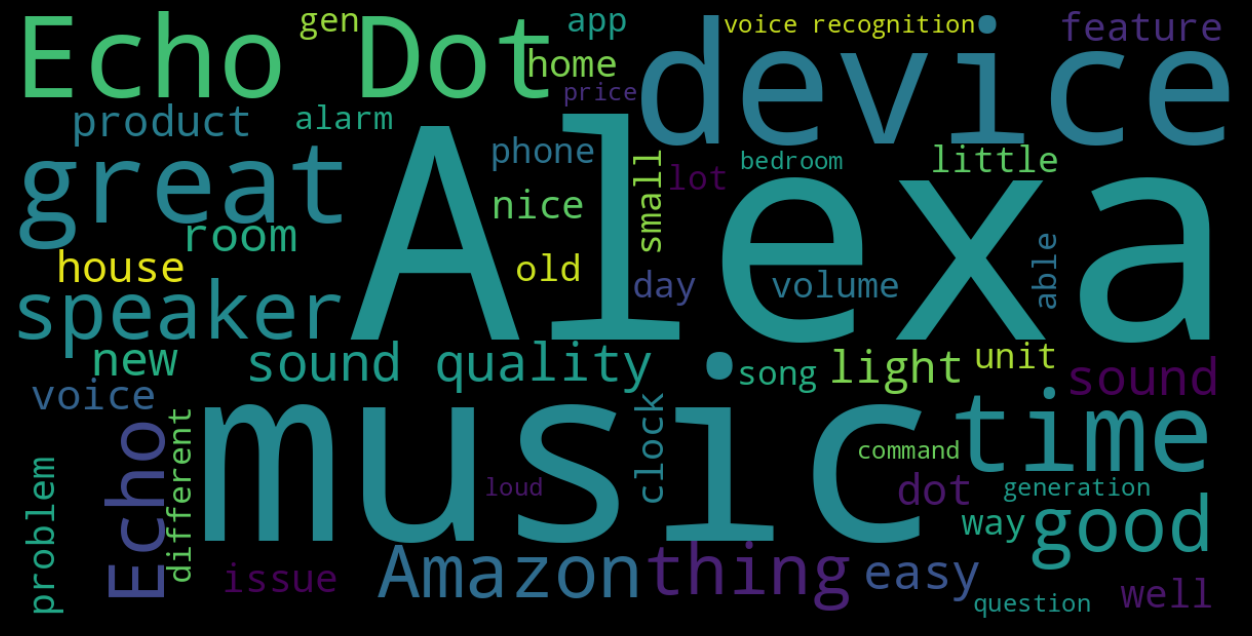

In [353]:
words_filtered = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop if token.pos_ in [
    'NOUN', 'ADJ', 'PROPN']]

wordcloud = WordCloud(background_color="black", max_words=50,
                      width=1200, height=600).generate(' '.join(words_filtered))

plt.figure(figsize=(16, 8), facecolor='k')
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


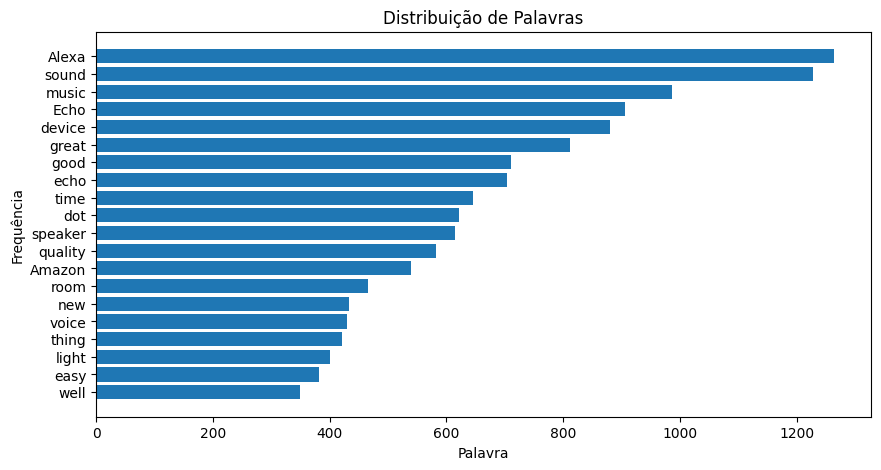

In [354]:
contagem = Counter(words_filtered).most_common(20)
words, freqs = [], []
for tup in contagem[::-1]:
    words.append(tup[0])
    freqs.append(tup[1])


# Criar um gr√°fico de barras para visualizar a distribui√ß√£o de palavras
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(words, freqs)
plt.xlabel('Palavra')
plt.ylabel('Frequ√™ncia')
plt.title('Distribui√ß√£o de Palavras')
plt.show()


Hmm, parece que seria interessante remover "alexa", "device" e palavras do tipo...


## Limpeza usando tokeniza√ß√£o, lematiza√ß√£o e entidades nomeadas


### Inspe√ß√£o


In [355]:
ents = [token for token in doc if token.ent_type]

print(f"{'token.text':^15} {'token.lemma_':^15} {'token.pos_':^15} {'token.tag_':^15} {'token.dep_':^15}"
      f"{'token.shape_':^15} {'token.is_alpha':^15} {'token.is_stop':^15} {'token.ent_type':^15} {'token.ent_type_':^15}")
for token in ents[:20]:
    print(f"{token.text:^15} {token.lemma_:^15} {token.pos_:^15} {token.tag_:^15} {token.dep_:^15}"
          f"{token.shape_:^15} {token.is_alpha:^15} {token.is_stop:^15} {token.ent_type:^15} {token.ent_type_:^15}")


  token.text     token.lemma_     token.pos_      token.tag_      token.dep_    token.shape_   token.is_alpha   token.is_stop  token.ent_type  token.ent_type_
      1st             1st             ADJ             JJ             amod            dxx              0               0              396           ORDINAL    
  Generation      Generation         PROPN            NNP          compound         Xxxxx             1               0              387            EVENT     
     Echo            Echo            PROPN            NNP            pobj           Xxxx              1               0              387            EVENT     
     Alexa           Alexa           PROPN            NNP          compound         Xxxxx             1               0              383             ORG      
     Alexa           Alexa           PROPN            NNP            pobj           Xxxxx             1               0              383             ORG      
   Trinidad        Trinidad          PROPN    

In [356]:
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"][:20])
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks][:10])


Verbs: ['love', 'recommend', 'trade', 'go', 'grow', 'downfall', 'seem', 'be', 'compare', 'say', 'get', 'play', 'find', 'see', 'return', 'get', 'love', 'have', 'interact', 'have']
Noun phrases: ['This', 'a great gift', 'someone', 'who', 'home', 'I', 'it', 'I', 'my 1st Generation Echo', 'the new model']


In [357]:
from spacy import displacy
displacy.render(doc[:100], style="ent", jupyter=True)


In [358]:
org_ents = [ent for ent in ents if ent.ent_type_ == "ORG"]
print(len(org_ents))
org_ents[:25]


3211


[Alexa,
 Alexa,
 Apple,
 Music,
 the,
 3rd,
 Gen,
 Echo,
 Alexa,
 the,
 3rd,
 Gen,
 Alexa,
 Loco,
 Loco,
 Alexa,
 Alexa,
 Buttons,
 Alexa,
 Alexa,
 Alexa,
 Amazon,
 Alexa,
 Alexa,
 Alexa]

In [359]:
len(doc)


201928

### Limpeza

Atributos adicionais para filtragem de entidades indesejadas


In [360]:
Token.set_extension("is_alexa", getter=lambda token: token.lemma_.lower() in [
                    "alexa", "alexas"], force=True)
Token.set_extension("is_echo", getter=lambda token: token.lemma_.lower() in [
                    "echo", "echos", "dot"], force=True)
Token.set_extension("is_amazon", getter=lambda token: bool(
    re.search("amazon(.[A-Za-z]*)?", token.lemma_.lower())), force=True)
Token.set_extension(
    "is_device", getter=lambda token: token.lemma_.lower() == "device", force=True)
len([token for token in doc if token._.is_alexa])


1490

In [361]:
org_ends_s = pd.Series(org_ents)
org_ends_s[~org_ends_s.map(
    lambda t: t._.is_alexa or t._.is_echo or t._.is_amazon or t._.is_device)].tolist()[:25]


[Apple,
 Music,
 the,
 3rd,
 Gen,
 the,
 3rd,
 Gen,
 Loco,
 Loco,
 Buttons,
 up.4,
 USB,
 USB,
 The,
 Spotify,
 Auto,
 Honeywell,
 Clock,
 IFTTT,
 YouTube,
 Apple,
 Wikipedia,
 Whosits.com,
 Clock]

In [362]:
filtered_ers = pd.Series(
    [token.text for token in doc
        if token._.is_alexa or token._.is_echo or token._.is_amazon or token._.is_device
     ]).unique().tolist()
len(filtered_ers)


35

In [363]:
words_filtered = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop if token.pos_ in [
    'NOUN', 'ADJ', 'PROPN']]


In [364]:
words_fileter_without_ners = [
    w for w in words_filtered if w not in filtered_ers]


In [365]:
print(len(words_filtered))
print(len(words_fileter_without_ners))


48097
42380


/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


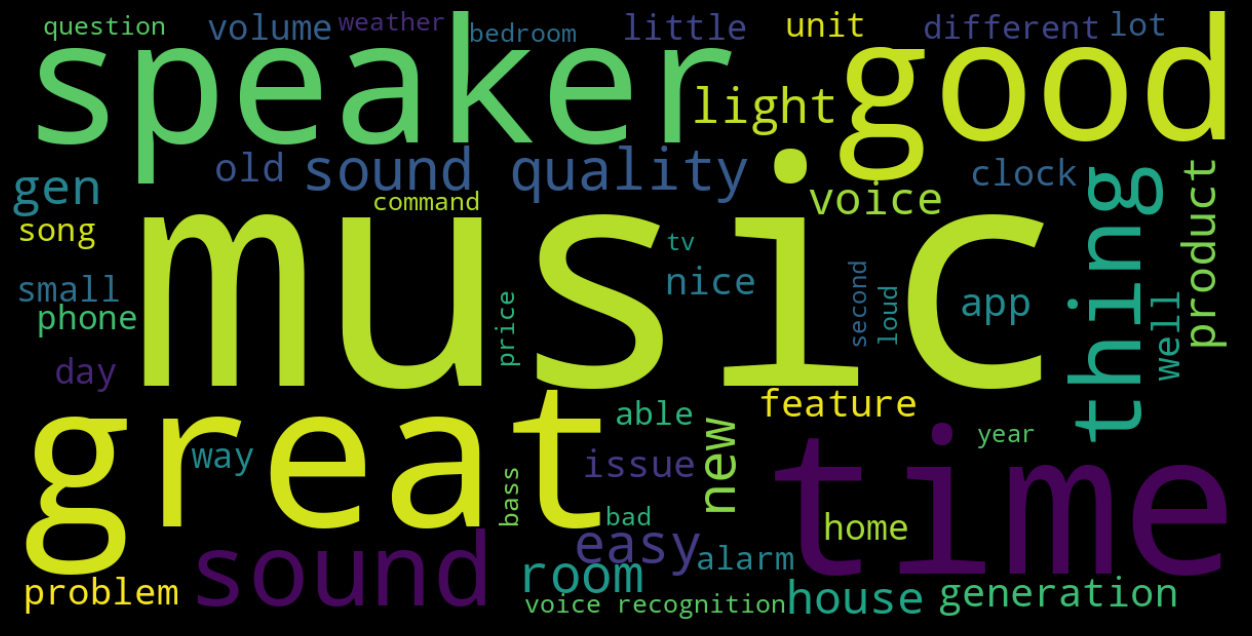

In [366]:
wordcloud = WordCloud(background_color="black", max_words=50, width=1200,
                      height=600).generate(' '.join(words_fileter_without_ners))

plt.figure(figsize=(16, 8), facecolor='k')
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


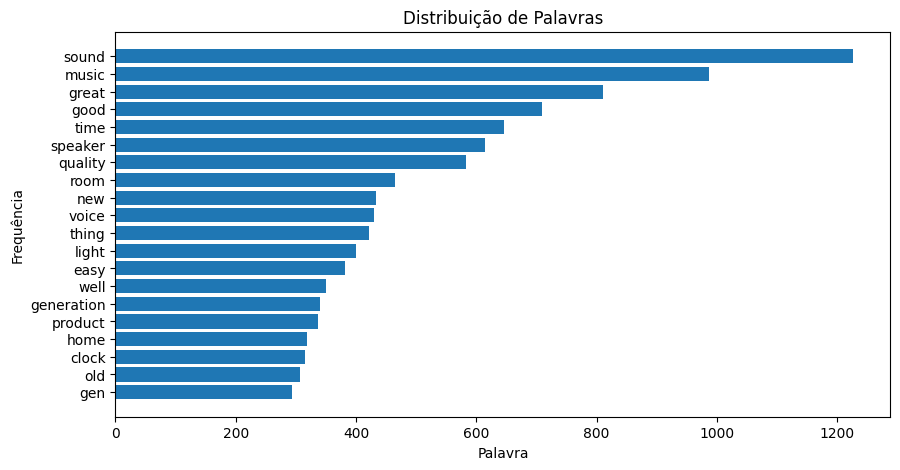

In [367]:
contagem = Counter(words_fileter_without_ners).most_common(20)
words, freqs = [], []
for tup in contagem[::-1]:
    words.append(tup[0])
    freqs.append(tup[1])


# Criar um gr√°fico de barras para visualizar a distribui√ß√£o de palavras
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(words, freqs)
plt.xlabel('Palavra')
plt.ylabel('Frequ√™ncia')
plt.title('Distribui√ß√£o de Palavras')
plt.show()


### Limpando o dataset


In [368]:
Token.set_extension("is_alexa", getter=lambda token: token.lemma_.lower() in [
                    "alexa", "alexas"], force=True)
Token.set_extension("is_echo", getter=lambda token: token.lemma_.lower() in [
                    "echo", "echos", "dot"], force=True)
Token.set_extension("is_amazon", getter=lambda token: bool(
    re.search("amazon(.[A-Za-z]*)?", token.lemma_.lower())), force=True)
Token.set_extension(
    "is_device", getter=lambda token: token.lemma_.lower() == "device", force=True)


In [369]:
def clean_doc(doc):
    filtered_ers = pd.Series(
        [token.text for token in doc
            if token._.is_alexa or token._.is_echo or token._.is_amazon or token._.is_device
         ]).unique().tolist()
    len(filtered_ers)

    words_filtered = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop and token.pos_ in [
        'NOUN', 'ADJ', 'PROPN']]
    return " ".join([w for w in words_filtered if w not in filtered_ers])


In [370]:
df["docs"] = df["reviews"].map(nlp)
df["clean_reviews"] = df["docs"].map(clean_doc)
df.head()


dates           country   
23096 2023-01-12  United States üá∫üá∏  \
9758  2021-12-03  United States üá∫üá∏   
27374 2022-12-29  United States üá∫üá∏   
37385 2021-04-06  United States üá∫üá∏   
21678 2023-02-27  United States üá∫üá∏   

                                            product_name orig_type   
23096                     Echo_Dot_3rd_Gen_2018_Charcoal   general  \
9758   Echo_4th_Gen_With_premium_sound_smart_home_hub...  positive   
27374  Echo_Dot_5th_Gen_2022_release_With_bigger_vibr...  positive   
37385  Echo_4th_Gen_With_premium_sound_smart_home_hub...  critical   
21678                     Echo_Dot_3rd_Gen_2018_Charcoal   general   

                                   configuration   
23096                 Configuration: Device only  \
9758     Color: Glacier WhiteConfiguration: Echo   
27374  Color: CharcoalConfiguration: Device only   
37385         Color: CharcoalConfiguration: Echo   
21678                 Configuration: Device only   

                                           color  base_price  config_price   
23096                 Configuration: Device only       22.92         15.06  \
9758     Color: Glacier WhiteConfiguration: Echo       61.76          0.00   
27374  Color: CharcoalConfiguration: Device only       29.99          0.00   
37385         Color: CharcoalConfiguration: Echo       61.76          0.00   
21678                 Configuration: Device only       22.92         15.06   

       bundle_price           names                        titles title_lang   
23096         59.98  Karimeriossss        I bought this as a gift         en  \
9758           0.00      Penang1970               I Love Alexa!!!         en   
27374          0.00   Tyrell  singh  Good deal and happy lighting         en   
37385          0.00     Jim Tellier                 Helllloooooo?         en   
21678         59.98    Marilyn Hupp              Reasonable Alexa         en   

                                                 reviews review_lang  stars   
23096  This is a great gift for someone who loves to ...          en      5  \
9758   I traded in my 1st Generation Echo for the new...          en      5   
27374  Only downfall with Alexa is it seems like ther...          en      4   
37385  The microphone sensitivity of this model is po...          en      3   
21678  I love the echo dot I have an echo show but th...          en      5   

       helpfuls                                               docs   
23096         1  (This, is, a, great, gift, for, someone, who, ...  \
9758          0  (I, traded, in, my, 1st, Generation, Echo, for...   
27374         0  (Only, downfall, with, Alexa, is, it, seems, l...   
37385         0  (The, microphone, sensitivity, of, this, model...   
21678         0  (I, love, the, echo, dot, I, have, an, echo, s...   

                                           clean_reviews  
23096                             great gift active home  
9758   Generation new model black cylinder blue globe...  
27374  integration Trinidad Tobago example news radio...  
37385  microphone sensitivity model poor Gen dot time...  
21678                        well hard time doti problem

In [371]:
df[["reviews", "clean_reviews"]].applymap(len).head()


reviews  clean_reviews
23096       88             22
9758       172             75
27374      219             84
37385      564            179
21678      255             27

In [372]:
df.iloc[0][["reviews", "clean_reviews"]]


reviews          This is a great gift for someone who loves to ...
clean_reviews                               great gift active home
Name: 23096, dtype: object

## An√°lise de sentimentos


In [373]:
blob = TextBlob(df.iloc[0]["reviews"])
print(blob.sentiment)

blob = TextBlob(df.iloc[0]["clean_reviews"])
print(blob.sentiment)

print(df.iloc[0][["stars"]])


Sentiment(polarity=0.22222222222222224, subjectivity=0.7000000000000001)
Sentiment(polarity=0.33333333333333337, subjectivity=0.675)
stars    5
Name: 23096, dtype: object


In [374]:
df["sentiment"] = df["clean_reviews"].map(lambda x: TextBlob(x).sentiment[0])
df["subjectivity"] = df["clean_reviews"].map(
    lambda x: TextBlob(x).sentiment[1])
df.head()


dates           country   
23096 2023-01-12  United States üá∫üá∏  \
9758  2021-12-03  United States üá∫üá∏   
27374 2022-12-29  United States üá∫üá∏   
37385 2021-04-06  United States üá∫üá∏   
21678 2023-02-27  United States üá∫üá∏   

                                            product_name orig_type   
23096                     Echo_Dot_3rd_Gen_2018_Charcoal   general  \
9758   Echo_4th_Gen_With_premium_sound_smart_home_hub...  positive   
27374  Echo_Dot_5th_Gen_2022_release_With_bigger_vibr...  positive   
37385  Echo_4th_Gen_With_premium_sound_smart_home_hub...  critical   
21678                     Echo_Dot_3rd_Gen_2018_Charcoal   general   

                                   configuration   
23096                 Configuration: Device only  \
9758     Color: Glacier WhiteConfiguration: Echo   
27374  Color: CharcoalConfiguration: Device only   
37385         Color: CharcoalConfiguration: Echo   
21678                 Configuration: Device only   

                                           color  base_price  config_price   
23096                 Configuration: Device only       22.92         15.06  \
9758     Color: Glacier WhiteConfiguration: Echo       61.76          0.00   
27374  Color: CharcoalConfiguration: Device only       29.99          0.00   
37385         Color: CharcoalConfiguration: Echo       61.76          0.00   
21678                 Configuration: Device only       22.92         15.06   

       bundle_price           names                        titles title_lang   
23096         59.98  Karimeriossss        I bought this as a gift         en  \
9758           0.00      Penang1970               I Love Alexa!!!         en   
27374          0.00   Tyrell  singh  Good deal and happy lighting         en   
37385          0.00     Jim Tellier                 Helllloooooo?         en   
21678         59.98    Marilyn Hupp              Reasonable Alexa         en   

                                                 reviews review_lang  stars   
23096  This is a great gift for someone who loves to ...          en      5  \
9758   I traded in my 1st Generation Echo for the new...          en      5   
27374  Only downfall with Alexa is it seems like ther...          en      4   
37385  The microphone sensitivity of this model is po...          en      3   
21678  I love the echo dot I have an echo show but th...          en      5   

       helpfuls                                               docs   
23096         1  (This, is, a, great, gift, for, someone, who, ...  \
9758          0  (I, traded, in, my, 1st, Generation, Echo, for...   
27374         0  (Only, downfall, with, Alexa, is, it, seems, l...   
37385         0  (The, microphone, sensitivity, of, this, model...   
21678         0  (I, love, the, echo, dot, I, have, an, echo, s...   

                                           clean_reviews  sentiment   
23096                             great gift active home   0.333333  \
9758   Generation new model black cylinder blue globe...   0.101212   
27374  integration Trinidad Tobago example news radio...   0.566667   
37385  microphone sensitivity model poor Gen dot time...   0.189583   
21678                        well hard time doti problem  -0.291667   

       subjectivity  
23096      0.675000  
9758       0.368485  
27374      0.716667  
37385      0.537500  
21678      0.541667

H√° alguma correla√ß√£o?


In [375]:
prod_id_map = {
    'Echo_Dot_3rd_Gen_2018_Charcoal': 1,
    'Echo_4th_Gen_With_premium_sound_smart_home_hub_and_Alexa': 2,
    'Echo_Dot_5th_Gen_2022_release_With_bigger_vibrant_sound_helpful_routines_and_Alexa': 3,
    'Echo_Dot_5th_Gen_2022_release_with_clock_Smart_speaker_with_clock_and_Alexa': 4
}

               prod_id  base_price     stars  helpfuls  sentiment   
prod_id       1.000000    0.137740  0.110780 -0.009089   0.064777  \
base_price    0.137740    1.000000 -0.016084 -0.027948   0.012106   
stars         0.110780   -0.016084  1.000000  0.007759   0.401904   
helpfuls     -0.009089   -0.027948  0.007759  1.000000  -0.007694   
sentiment     0.064777    0.012106  0.401904 -0.007694   1.000000   
subjectivity  0.025285    0.045437  0.128343 -0.010068   0.481886   

              subjectivity  
prod_id           0.025285  
base_price        0.045437  
stars             0.128343  
helpfuls         -0.010068  
sentiment         0.481886  
subjectivity      1.000000  


<Axes: >

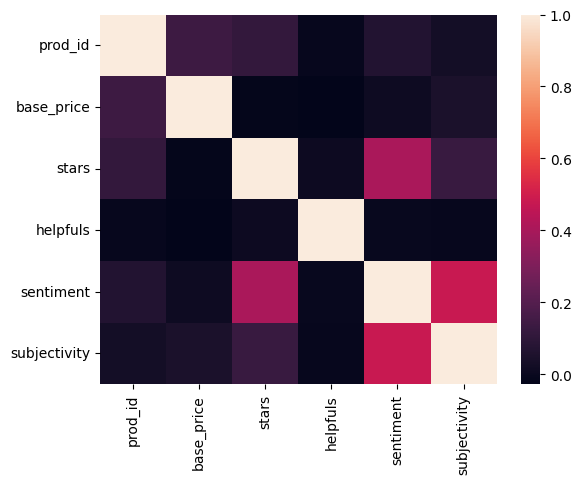

In [376]:
tmp_df = df.copy()
tmp_df["prod_id"] = df["product_name"].map(lambda x: prod_id_map[x])


print(tmp_df[["prod_id", "base_price", "stars",
        "helpfuls", "sentiment", "subjectivity"]].corr())

sns.heatmap(tmp_df[["prod_id", "base_price", "stars",
            "helpfuls", "sentiment", "subjectivity"]].corr())


In [377]:
df.groupby("product_name").agg({"sentiment": "mean", "stars": "mean"})


sentiment     stars
product_name                                                           
Echo_4th_Gen_With_premium_sound_smart_home_hub_...   0.232706  3.891658
Echo_Dot_3rd_Gen_2018_Charcoal                       0.225266   3.93887
Echo_Dot_5th_Gen_2022_release_With_bigger_vibra...   0.226610  3.996394
Echo_Dot_5th_Gen_2022_release_with_clock_Smart_...   0.286630  4.353293

H√° certa correla√ß√£o positiva entra sentimento e estrelas


E com o tempo?


Vamos fracionar em per√≠odos de 90 dias


In [378]:
print(df.dates.min())
print(df.dates.max())
print(df.dates.max() - df.dates.min())
print("bins", ((df.dates.max() - df.dates.min()).days/90))
print((df.dates.max() - df.dates.min()) /
      ((df.dates.max() - df.dates.min()).days/90))


2019-08-01 00:00:00
2023-04-30 00:00:00
1368 days 00:00:00
bins 15.2
90 days 00:00:00


In [379]:
df["date_bins"] = pd.cut(df["dates"], int(
    ((df.dates.max() - df.dates.min()).days/90)))
df["date_bins"] = df["date_bins"].map(lambda x: x.left.date())
df.head()


dates           country   
23096 2023-01-12  United States üá∫üá∏  \
9758  2021-12-03  United States üá∫üá∏   
27374 2022-12-29  United States üá∫üá∏   
37385 2021-04-06  United States üá∫üá∏   
21678 2023-02-27  United States üá∫üá∏   

                                            product_name orig_type   
23096                     Echo_Dot_3rd_Gen_2018_Charcoal   general  \
9758   Echo_4th_Gen_With_premium_sound_smart_home_hub...  positive   
27374  Echo_Dot_5th_Gen_2022_release_With_bigger_vibr...  positive   
37385  Echo_4th_Gen_With_premium_sound_smart_home_hub...  critical   
21678                     Echo_Dot_3rd_Gen_2018_Charcoal   general   

                                   configuration   
23096                 Configuration: Device only  \
9758     Color: Glacier WhiteConfiguration: Echo   
27374  Color: CharcoalConfiguration: Device only   
37385         Color: CharcoalConfiguration: Echo   
21678                 Configuration: Device only   

                                           color  base_price  config_price   
23096                 Configuration: Device only       22.92         15.06  \
9758     Color: Glacier WhiteConfiguration: Echo       61.76          0.00   
27374  Color: CharcoalConfiguration: Device only       29.99          0.00   
37385         Color: CharcoalConfiguration: Echo       61.76          0.00   
21678                 Configuration: Device only       22.92         15.06   

       bundle_price           names  ... title_lang   
23096         59.98  Karimeriossss   ...         en  \
9758           0.00      Penang1970  ...         en   
27374          0.00   Tyrell  singh  ...         en   
37385          0.00     Jim Tellier  ...         en   
21678         59.98    Marilyn Hupp  ...         en   

                                                 reviews review_lang stars   
23096  This is a great gift for someone who loves to ...          en     5  \
9758   I traded in my 1st Generation Echo for the new...          en     5   
27374  Only downfall with Alexa is it seems like ther...          en     4   
37385  The microphone sensitivity of this model is po...          en     3   
21678  I love the echo dot I have an echo show but th...          en     5   

       helpfuls                                               docs   
23096         1  (This, is, a, great, gift, for, someone, who, ...  \
9758          0  (I, traded, in, my, 1st, Generation, Echo, for...   
27374         0  (Only, downfall, with, Alexa, is, it, seems, l...   
37385         0  (The, microphone, sensitivity, of, this, model...   
21678         0  (I, love, the, echo, dot, I, have, an, echo, s...   

                                           clean_reviews sentiment   
23096                             great gift active home  0.333333  \
9758   Generation new model black cylinder blue globe...  0.101212   
27374  integration Trinidad Tobago example news radio...  0.566667   
37385  microphone sensitivity model poor Gen dot time...  0.189583   
21678                        well hard time doti problem -0.291667   

       subjectivity   date_bins  
23096      0.675000  2022-10-29  
9758       0.368485  2021-10-29  
27374      0.716667  2022-10-29  
37385      0.537500  2021-01-29  
21678      0.541667  2023-01-28  

[5 rows x 21 columns]

In [380]:
df["product_name"].unique()


array(['Echo_Dot_3rd_Gen_2018_Charcoal',
       'Echo_4th_Gen_With_premium_sound_smart_home_hub_and_Alexa',
       'Echo_Dot_5th_Gen_2022_release_With_bigger_vibrant_sound_helpful_routines_and_Alexa',
       'Echo_Dot_5th_Gen_2022_release_with_clock_Smart_speaker_with_clock_and_Alexa'],
      dtype=object)

               prod_id  base_price     stars  helpfuls  sentiment   
prod_id       1.000000    0.137740  0.110780 -0.009089   0.064777  \
base_price    0.137740    1.000000 -0.016084 -0.027948   0.012106   
stars         0.110780   -0.016084  1.000000  0.007759   0.401904   
helpfuls     -0.009089   -0.027948  0.007759  1.000000  -0.007694   
sentiment     0.064777    0.012106  0.401904 -0.007694   1.000000   
subjectivity  0.025285    0.045437  0.128343 -0.010068   0.481886   
date_bins     0.460075   -0.169104  0.228409  0.034946   0.094563   

              subjectivity  date_bins  
prod_id           0.025285   0.460075  
base_price        0.045437  -0.169104  
stars             0.128343   0.228409  
helpfuls         -0.010068   0.034946  
sentiment         0.481886   0.094563  
subjectivity      1.000000  -0.024306  
date_bins        -0.024306   1.000000  


<Axes: >

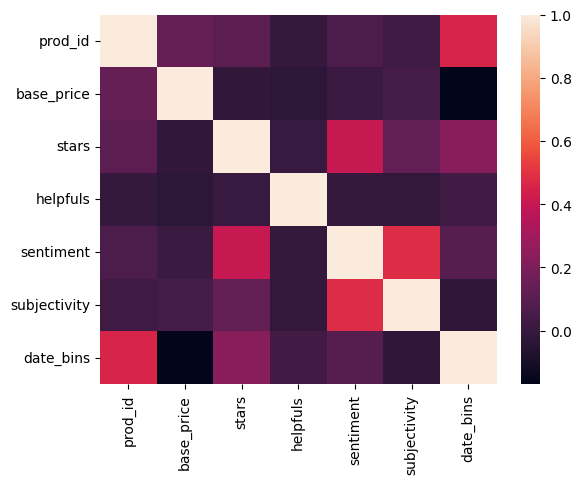

In [381]:
tmp_df = df.copy()
tmp_df["prod_id"] = df["product_name"].map(lambda x: prod_id_map[x])
tmp_df["date_bins"] = df["date_bins"].map(
    lambda x: 10000*x.year + 100*x.month + x.day).astype(int)
# tmp_df[["prod_id", "base_price", "stars", "helpfuls","sentiment","subjectivity","date_bins"]].corr()
print(tmp_df[["prod_id", "base_price", "stars", "helpfuls",
      "sentiment", "subjectivity", "date_bins"]].corr())
sns.heatmap(tmp_df[["prod_id", "base_price", "stars", "helpfuls",
            "sentiment", "subjectivity", "date_bins"]].corr())


H√° uma certa correla√ß√£o entre o per√≠odo e pre√ßo, al√©m de uma baixa correla√ß√£o entre per√≠odo e estrelas

In [382]:
df.groupby("date_bins")["date_bins"].count()

date_bins
2019-07-30      13
2019-10-31      75
2020-01-30      30
2020-04-30      30
2020-07-30      38
2020-10-30     147
2021-01-29     121
2021-04-30      84
2021-07-30      66
2021-10-29     179
2022-01-29     134
2022-04-30     172
2022-07-30     311
2022-10-29    1242
2023-01-28     816
Name: date_bins, dtype: int64

In [383]:
df.groupby("date_bins").agg({"base_price":"mean"})

base_price
date_bins             
2019-07-30   22.920000
2019-10-31   22.920000
2020-01-30   22.920000
2020-04-30   22.920000
2020-07-30   25.986316
2020-10-30   54.097687
2021-01-29   55.661157
2021-04-30   52.512381
2021-07-30   49.401818
2021-10-29   53.514637
2022-01-29   53.064478
2022-04-30   51.598372
2022-07-30   39.835756
2022-10-29   34.612890
2023-01-28   33.823333

In [384]:
df.groupby("date_bins").agg({"stars":"mean"})

stars
date_bins           
2019-07-30  2.615385
2019-10-31      3.24
2020-01-30  3.033333
2020-04-30       3.0
2020-07-30  2.894737
2020-10-30  3.190476
2021-01-29  3.408333
2021-04-30  3.416667
2021-07-30  3.181818
2021-10-29  3.916201
2022-01-29  4.089552
2022-04-30  4.284884
2022-07-30  4.379421
2022-10-29  4.278583
2023-01-28  4.120098

H√° uma correla√ß√£o entre a data da avalia√ß√£o e o pre√ßo do produto, que se explica prov√°velmente por que os pre√ßos s√£o os pre√ßos de hoje. Produtos mais antigos custam menos hoje.

In [385]:
print(df.dates.min())
print(df.dates.max())
df.groupby(["product_name", "date_bins"]).agg(
    {"sentiment": "mean", "stars": "mean"}).sort_values(["sentiment", "stars"], ascending=False).head(20)


2019-08-01 00:00:00
2023-04-30 00:00:00


sentiment   
product_name                                       date_bins               
Echo_Dot_5th_Gen_2022_release_with_clock_Smart_... 2022-10-29   0.323041  \
Echo_4th_Gen_With_premium_sound_smart_home_hub_... 2022-07-30   0.322845   
Echo_Dot_3rd_Gen_2018_Charcoal                     2022-10-29   0.312720   
                                                   2022-07-30   0.309710   
Echo_4th_Gen_With_premium_sound_smart_home_hub_... 2021-10-29   0.303622   
                                                   2022-04-30   0.302684   
Echo_Dot_5th_Gen_2022_release_with_clock_Smart_... 2022-07-30   0.261182   
Echo_4th_Gen_With_premium_sound_smart_home_hub_... 2022-01-29   0.244089   
                                                   2023-01-28   0.241486   
                                                   2020-07-30   0.236825   
Echo_Dot_5th_Gen_2022_release_with_clock_Smart_... 2023-01-28   0.233505   
Echo_Dot_3rd_Gen_2018_Charcoal                     2023-01-28   0.231178   
Echo_Dot_5th_Gen_2022_release_With_bigger_vibra... 2022-10-29   0.226973   
                                                   2023-01-28   0.226694   
                                                   2022-07-30   0.217851   
Echo_4th_Gen_With_premium_sound_smart_home_hub_... 2022-10-29   0.207440   
Echo_Dot_3rd_Gen_2018_Charcoal                     2022-04-30   0.206322   
                                                   2021-10-29   0.197911   
                                                   2020-01-30   0.185869   
Echo_4th_Gen_With_premium_sound_smart_home_hub_... 2021-04-30   0.177283   

                                                                  stars  
product_name                                       date_bins             
Echo_Dot_5th_Gen_2022_release_with_clock_Smart_... 2022-10-29  4.458678  
Echo_4th_Gen_With_premium_sound_smart_home_hub_... 2022-07-30  4.391304  
Echo_Dot_3rd_Gen_2018_Charcoal                     2022-10-29  4.692683  
                                                   2022-07-30  4.566176  
Echo_4th_Gen_With_premium_sound_smart_home_hub_... 2021-10-29  4.028369  
                                                   2022-04-30  4.440945  
Echo_Dot_5th_Gen_2022_release_with_clock_Smart_... 2022-07-30  4.243243  
Echo_4th_Gen_With_premium_sound_smart_home_hub_... 2022-01-29  4.230769  
                                                   2023-01-28  3.677419  
                                                   2020-07-30  3.666667  
Echo_Dot_5th_Gen_2022_release_with_clock_Smart_... 2023-01-28  4.203822  
Echo_Dot_3rd_Gen_2018_Charcoal                     2023-01-28  4.248227  
Echo_Dot_5th_Gen_2022_release_With_bigger_vibra... 2022-10-29  4.002088  
                                                   2023-01-28  4.027273  
                                                   2022-07-30  3.434783  
Echo_4th_Gen_With_premium_sound_smart_home_hub_... 2022-10-29  3.743243  
Echo_Dot_3rd_Gen_2018_Charcoal                     2022-04-30  3.844444  
                                                   2021-10-29       3.5  
                                                   2020-01-30  3.033333  
Echo_4th_Gen_With_premium_sound_smart_home_hub_... 2021-04-30  3.578125

O per√≠odo tamb√©m apresenta uma leve correla√ß√£o com a quantidade de estrelas


In [386]:
df.groupby(["product_name"]).agg(
    {"sentiment": "mean", "stars": "mean"}).sort_values(["sentiment", "stars"], ascending=False)

sentiment     stars
product_name                                                           
Echo_Dot_5th_Gen_2022_release_with_clock_Smart_...   0.286630  4.353293
Echo_4th_Gen_With_premium_sound_smart_home_hub_...   0.232706  3.891658
Echo_Dot_5th_Gen_2022_release_With_bigger_vibra...   0.226610  3.996394
Echo_Dot_3rd_Gen_2018_Charcoal                       0.225266   3.93887

Disparado, o preferido do p√∫blico √© o Echo Dot 5 com rel√≥gio. Talvez isso explique a palavra "time" aparecer tanto na nuvem de palavras

## T√≥picos - o qu√™ as pessoas est√£o dizendo?

In [387]:
def analyze_topics(df):
    def make_n_grams(text):
        text = text.split()
        bigram = Phrases(text, min_count=5, threshold=100)
        trigram = Phrases(bigram[text], threshold=100)
        return trigram[bigram[text]]

    df["ngrams"] = df["clean_reviews"].map(make_n_grams)

    dictionary = Dictionary(df['ngrams'])
    corpus = [dictionary.doc2bow(text) for text in df['ngrams']]

    num_topics = 5

    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10)

    for i, topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=5):
        print('Topic {}: {}'.format(i, topic))

    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
    return(vis)
analyze_topics(df)

Topic 0: 0.079*"sound" + 0.047*"quality" + 0.032*"speaker" + 0.021*"room" + 0.015*"generation"
Topic 1: 0.042*"music" + 0.023*"sound" + 0.022*"good" + 0.021*"speaker" + 0.017*"time"
Topic 2: 0.022*"new" + 0.021*"gift" + 0.016*"support" + 0.015*"hour" + 0.013*"tech"
Topic 3: 0.037*"voice" + 0.023*"new" + 0.019*"old" + 0.016*"recognition" + 0.013*"sound"
Topic 4: 0.043*"great" + 0.031*"clock" + 0.023*"light" + 0.020*"easy" + 0.017*"sound"


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.044386  0.022222       1        1  36.141283
4     -0.022333  0.126394       2        1  24.586711
0     -0.142650 -0.005737       3        1  14.395624
3      0.011660 -0.167908       4        1  13.063527
2      0.197709  0.025030       5        1  11.812855, topic_info=        Term         Freq        Total Category  logprob  loglift
13     sound  1098.000000  1098.000000  Default  30.0000  30.0000
36   quality   505.000000   505.000000  Default  29.0000  29.0000
95     clock   347.000000   347.000000  Default  28.0000  28.0000
103    voice   382.000000   382.000000  Default  27.0000  27.0000
68   speaker   575.000000   575.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
33     music    54.112577   896.442804   Topic5  -4.5400  -0.6714
256    issue    30.403616   188.307926   Topic5  -5.1165   0.3125
222  product    30.835285   307.918937   Topic5  -5.1025  -0.1652
98     thing    29.524971   383.491100   Topic5  -5.1459  -0.4281
3       home    26.938964   275.652424   Topic5  -5.2375  -0.1896

[371 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1397      1  0.906873       Alex
15        1  0.980832      Apple
1591      4  0.834346      Blink
236       1  0.776703  Bluetooth
236       2  0.052658  Bluetooth
...     ...       ...        ...
196       3  0.155296       year
196       4  0.116472       year
196       5  0.357180       year
1135      5  0.772869         yr
672       2  0.831672          z

[679 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 1, 4, 3])

Vamos ver o qu√™ os mais cr√≠ticos est√£o dizendo

In [388]:
analyze_topics(df[df["stars"] < df["stars"].quantile(0.1)])

/tmp/ipykernel_7146/776637196.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ngrams"] = df["clean_reviews"].map(make_n_grams)


Topic 0: 0.052*"music" + 0.016*"new" + 0.015*"product" + 0.013*"time" + 0.012*"speaker"
Topic 1: 0.018*"phone" + 0.017*"Wi" + 0.015*"Fi" + 0.011*"month" + 0.010*"app"
Topic 2: 0.028*"time" + 0.013*"thing" + 0.012*"sound" + 0.011*"music" + 0.011*"light"
Topic 3: 0.014*"time" + 0.013*"new" + 0.012*"hour" + 0.010*"thing" + 0.010*"old"
Topic 4: 0.023*"music" + 0.016*"song" + 0.015*"quality" + 0.014*"gen" + 0.014*"service"


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.024490 -0.013743       1        1  30.247123
2     -0.071947 -0.036273       2        1  26.306198
3      0.045610 -0.095221       3        1  17.199067
4     -0.066191  0.085141       4        1  15.688913
1      0.117019  0.060096       5        1  10.558699, topic_info=        Term        Freq       Total Category  logprob  loglift
13     music  124.000000  124.000000  Default  30.0000  30.0000
566       Wi   12.000000   12.000000  Default  29.0000  29.0000
564       Fi   12.000000   12.000000  Default  28.0000  28.0000
200    phone   27.000000   27.000000  Default  27.0000  27.0000
134  service   25.000000   25.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
90     sound    3.188749   42.835522   Topic5  -5.1655  -0.3495
13     music    3.625422  124.766750   Topic5  -5.0372  -1.2903
83      time    3.280197   80.794964   Topic5  -5.1373  -0.9558
233     room    2.804695   31.618872   Topic5  -5.2939  -0.1742
238     year    2.658655   26.785201   Topic5  -5.3473  -0.0618

[371 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
469       1  0.812257     AI
469       2  0.203064     AI
239       4  0.670228     AL
240       4  0.891441     Al
879       1  0.820774  Alexi
...     ...       ...    ...
238       1  0.336006   year
238       2  0.298672   year
238       3  0.186670   year
238       4  0.074668   year
238       5  0.112002   year

[590 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 4, 5, 2])

Not√°vel as palavras "time", al√©m de "music", "sound", "song" e "quality" em quase todos os t√≥picos

E os mais positivos

In [395]:
analyze_topics(df[df["stars"] >= df["stars"].quantile(0.1)])

/tmp/ipykernel_7146/776637196.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ngrams"] = df["clean_reviews"].map(make_n_grams)


Topic 0: 0.028*"music" + 0.021*"smart" + 0.017*"home" + 0.017*"great" + 0.014*"room"
Topic 1: 0.031*"time" + 0.025*"music" + 0.019*"easy" + 0.019*"great" + 0.013*"thing"
Topic 2: 0.032*"sound" + 0.031*"generation" + 0.025*"new" + 0.024*"gen" + 0.022*"well"
Topic 3: 0.075*"sound" + 0.049*"great" + 0.041*"good" + 0.037*"quality" + 0.036*"speaker"
Topic 4: 0.069*"clock" + 0.026*"display" + 0.020*"night" + 0.018*"bright" + 0.018*"feature"


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.006240 -0.091587       1        1  27.567092
3     -0.116307 -0.031940       2        1  24.599325
2     -0.098620  0.172827       3        1  23.420157
1     -0.009877 -0.100232       4        1  17.128987
4      0.231044  0.050933       5        1   7.284438, topic_info=           Term         Freq        Total Category  logprob  loglift
95        clock   337.000000   337.000000  Default  30.0000  30.0000
13        sound  1063.000000  1063.000000  Default  29.0000  29.0000
74   generation   279.000000   279.000000  Default  28.0000  28.0000
2         great   771.000000   771.000000  Default  27.0000  27.0000
36      quality   472.000000   472.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
129        easy    13.309497   375.217637   Topic5  -5.3269  -0.7196
30         good    14.108349   606.082782   Topic5  -5.2686  -1.1408
85        small    11.283698   161.312927   Topic5  -5.4921  -0.0406
33        music    13.351893   734.374595   Topic5  -5.3238  -1.3879
119       phone    11.011000   151.895361   Topic5  -5.5165  -0.0049

[371 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2155      5  0.853083     Alexis
196       1  0.060390  Bluetooth
196       2  0.543509  Bluetooth
196       3  0.045292  Bluetooth
196       4  0.271754  Bluetooth
...     ...       ...        ...
174       1  0.119731       year
174       2  0.538789       year
174       3  0.089798       year
174       4  0.139686       year
174       5  0.099776       year

[677 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2, 5])

E por produto?

In [391]:
sub_dfs = {}
for product_name in df["product_name"].unique().tolist():
  sub_dfs[product_name] = df[df["product_name"] == product_name]
sub_dfs

{'Echo_Dot_3rd_Gen_2018_Charcoal':            dates           country                    product_name orig_type   
 23096 2023-01-12  United States üá∫üá∏  Echo_Dot_3rd_Gen_2018_Charcoal   general  \
 21678 2023-02-27  United States üá∫üá∏  Echo_Dot_3rd_Gen_2018_Charcoal   general   
 4344  2021-08-14  United States üá∫üá∏  Echo_Dot_3rd_Gen_2018_Charcoal  positive   
 34114 2022-04-01  United States üá∫üá∏  Echo_Dot_3rd_Gen_2018_Charcoal  critical   
 3123  2022-12-21  United States üá∫üá∏  Echo_Dot_3rd_Gen_2018_Charcoal  positive   
 ...          ...               ...                             ...       ...   
 34600 2020-05-04  United States üá∫üá∏  Echo_Dot_3rd_Gen_2018_Charcoal  critical   
 23265 2022-11-01  United States üá∫üá∏  Echo_Dot_3rd_Gen_2018_Charcoal   general   
 26349 2022-10-17  United States üá∫üá∏  Echo_Dot_3rd_Gen_2018_Charcoal   general   
 34237 2020-06-16  United States üá∫üá∏  Echo_Dot_3rd_Gen_2018_Charcoal  critical   
 25858 2022-06-02  Un

In [396]:
df["product_name"].unique().tolist()

['Echo_Dot_3rd_Gen_2018_Charcoal',
 'Echo_4th_Gen_With_premium_sound_smart_home_hub_and_Alexa',
 'Echo_Dot_5th_Gen_2022_release_With_bigger_vibrant_sound_helpful_routines_and_Alexa',
 'Echo_Dot_5th_Gen_2022_release_with_clock_Smart_speaker_with_clock_and_Alexa']

In [ ]:
analyze_topics(df[df["stars"] >= df["stars"].quantile(0.1)])

In [399]:
echo_3_df = sub_dfs["Echo_Dot_3rd_Gen_2018_Charcoal"]
echo_4_df = sub_dfs["Echo_4th_Gen_With_premium_sound_smart_home_hub_and_Alexa"]
echo_5_df = sub_dfs["Echo_Dot_5th_Gen_2022_release_with_clock_Smart_speaker_with_clock_and_Alexa"]
echo_5_clock_df = sub_dfs["Echo_Dot_5th_Gen_2022_release_With_bigger_vibrant_sound_helpful_routines_and_Alexa"]


In [400]:
analyze_topics(echo_3_df[echo_3_df["stars"] < echo_3_df["stars"].quantile(0.1)])

/tmp/ipykernel_7146/776637196.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ngrams"] = df["clean_reviews"].map(make_n_grams)


Topic 0: 0.047*"music" + 0.023*"time" + 0.015*"room" + 0.013*"Google" + 0.013*"thing"
Topic 1: 0.027*"time" + 0.027*"music" + 0.027*"thing" + 0.015*"speaker" + 0.015*"service"
Topic 2: 0.018*"issue" + 0.015*"hour" + 0.012*"problem" + 0.010*"bass" + 0.010*"simple"
Topic 3: 0.019*"phone" + 0.018*"app" + 0.016*"day" + 0.013*"music" + 0.013*"song"
Topic 4: 0.024*"app" + 0.017*"system" + 0.016*"time" + 0.015*"song" + 0.012*"plug"


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.088556  0.042767       1        1  25.945288
2     -0.130995  0.017016       2        1  20.588737
1     -0.000905  0.088714       3        1  20.423626
3      0.001640 -0.117687       4        1  18.328623
4      0.041704 -0.030811       5        1  14.713725, topic_info=       Term       Freq      Total Category  logprob  loglift
93    music  24.000000  24.000000  Default  30.0000  30.0000
42      app   9.000000   9.000000  Default  29.0000  29.0000
110   issue   6.000000   6.000000  Default  28.0000  28.0000
21   system   3.000000   3.000000  Default  27.0000  27.0000
128   phone   6.000000   6.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
93    music   1.320150  24.051983   Topic5  -4.8252  -0.9861
12     home   0.845900   5.417441   Topic5  -5.2703   0.0594
212   power   0.785431   3.243071   Topic5  -5.3444   0.4983
50    great   0.788747   5.327310   Topic5  -5.3402   0.0062
166   month   0.749953   4.501949   Topic5  -5.3907   0.1241

[291 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
177       1  0.954345      AI
426       1  0.954354   Alexi
526       4  0.768754  Alexia
366       2  0.986321     App
138       4  0.775372    Bose
...     ...       ...     ...
102       1  0.127173    year
102       2  0.127173    year
102       3  0.254347    year
102       4  0.254347    year
102       5  0.127173    year

[366 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 4, 5])

In [402]:
analyze_topics(echo_4_df[echo_4_df["stars"] < echo_4_df["stars"].quantile(0.2)])

/tmp/ipykernel_7146/776637196.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ngrams"] = df["clean_reviews"].map(make_n_grams)


Topic 0: 0.025*"music" + 0.014*"room" + 0.014*"light" + 0.013*"song" + 0.012*"cord"
Topic 1: 0.035*"sound" + 0.020*"quality" + 0.012*"speaker" + 0.012*"smart" + 0.012*"issue"
Topic 2: 0.038*"gen" + 0.028*"time" + 0.018*"music" + 0.015*"good" + 0.015*"sound"
Topic 3: 0.054*"music" + 0.029*"new" + 0.015*"generation" + 0.012*"playlist" + 0.011*"month"
Topic 4: 0.020*"sound" + 0.016*"quality" + 0.015*"Gen" + 0.014*"unit" + 0.013*"voice"


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.047140 -0.016650       1        1  30.933726
4      0.067888 -0.047589       2        1  24.309299
0     -0.081767  0.102768       3        1  18.086588
3     -0.110481 -0.082012       4        1  14.534842
1      0.077220  0.043483       5        1  12.135546, topic_info=        Term       Freq      Total Category  logprob  loglift
13     music  63.000000  63.000000  Default  30.0000  30.0000
46       new  27.000000  27.000000  Default  29.0000  29.0000
103      gen  48.000000  48.000000  Default  28.0000  28.0000
49     sound  53.000000  53.000000  Default  27.0000  27.0000
77   quality  25.000000  25.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
103      gen   3.435693  48.095543   Topic5  -4.7590  -0.5299
28     house   2.099227  13.780798   Topic5  -5.2517   0.2273
13     music   2.270435  63.845708   Topic5  -5.1733  -1.2275
69   product   2.101388  17.156523   Topic5  -5.2507   0.0093
104    great   2.079484  16.966416   Topic5  -5.2611   0.0099

[328 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
155       3  0.671969     AL
916       5  0.718833    Add
156       3  0.896277     Al
1015      2  0.860080    App
840       4  0.936277  Audio
...     ...       ...    ...
82        3  0.094037  worth
82        5  0.282110  worth
508       1  0.196216  wrong
508       3  0.196216  wrong
508       4  0.588647  wrong

[526 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 1, 4, 2])

In [403]:
analyze_topics(echo_5_df[echo_5_df["stars"] < echo_5_df["stars"].quantile(0.1)])

/tmp/ipykernel_7146/776637196.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ngrams"] = df["clean_reviews"].map(make_n_grams)


Topic 0: 0.040*"music" + 0.022*"wifi" + 0.022*"support" + 0.017*"device" + 0.017*"Apple"
Topic 1: 0.038*"Wi" + 0.038*"Fi" + 0.025*"phone" + 0.021*"music" + 0.017*"old"
Topic 2: 0.023*"music" + 0.016*"Fi" + 0.016*"Wi" + 0.016*"product" + 0.016*"bad"
Topic 3: 0.018*"item" + 0.018*"frustrating" + 0.018*"week" + 0.018*"shipping" + 0.013*"horrible"
Topic 4: 0.019*"joke" + 0.014*"warranty" + 0.014*"room" + 0.014*"setting" + 0.014*"new"


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.116893 -0.025597       1        1  31.185473
1      0.035524  0.122717       2        1  21.565613
4     -0.104593  0.015745       3        1  19.407418
0      0.013734 -0.088564       4        1  14.923678
3     -0.061558 -0.024300       5        1  12.917818, topic_info=            Term       Freq      Total Category  logprob  loglift
65            Wi  10.000000  10.000000  Default  30.0000  30.0000
167           Fi  10.000000  10.000000  Default  29.0000  29.0000
96          wifi   4.000000   4.000000  Default  28.0000  28.0000
59       support   5.000000   5.000000  Default  27.0000  27.0000
379  frustrating   2.000000   2.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
187      factory   0.667581   2.607373   Topic5  -4.9869   0.6841
181     customer   0.667521   1.787635   Topic5  -4.9870   1.0615
138        cheap   0.667388   1.937647   Topic5  -4.9872   0.9807
40         sound   0.667387   3.856078   Topic5  -4.9872   0.2925
330      Spotify   0.667383   1.787643   Topic5  -4.9872   1.0613

[287 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
328       2  0.762720       AI
49        4  0.829100    Apple
192       1  0.723642     Best
193       1  0.723642      Buy
282       4  0.811987  DEVICES
...     ...       ...      ...
356       2  0.762729   wonder
48        2  0.762720    worth
136       1  0.631602     year
136       4  0.210534     year
136       5  0.210534     year

[342 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 5, 1, 4])

In [405]:
analyze_topics(echo_5_clock_df[echo_5_clock_df["stars"] < echo_5_clock_df["stars"].quantile(0.21)])

/tmp/ipykernel_7146/776637196.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ngrams"] = df["clean_reviews"].map(make_n_grams)


Topic 0: 0.023*"time" + 0.021*"speaker" + 0.015*"music" + 0.014*"product" + 0.014*"money"
Topic 1: 0.021*"gen" + 0.015*"new" + 0.013*"sound" + 0.012*"hour" + 0.011*"music"
Topic 2: 0.020*"music" + 0.019*"sound" + 0.017*"generation" + 0.016*"Gen" + 0.014*"time"
Topic 3: 0.016*"music" + 0.014*"voice" + 0.012*"volume" + 0.010*"ad" + 0.010*"junk"
Topic 4: 0.023*"generation" + 0.017*"speaker" + 0.015*"light" + 0.014*"new" + 0.012*"stereo"


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.017014 -0.093611       1        1  41.121096
2     -0.098708  0.064444       2        1  25.176205
3      0.109341  0.062662       3        1  13.415387
1      0.026730 -0.058722       4        1  12.471413
4     -0.020349  0.025228       5        1   7.815900, topic_info=           Term       Freq      Total Category  logprob  loglift
52      speaker  28.000000  28.000000  Default  30.0000  30.0000
90   generation  24.000000  24.000000  Default  29.0000  29.0000
50          gen  19.000000  19.000000  Default  28.0000  28.0000
248         new  24.000000  24.000000  Default  27.0000  27.0000
157       light  14.000000  14.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
23      product   1.753278  25.292942   Topic5  -4.7302  -0.1200
99          app   1.465420  16.569419   Topic5  -4.9096   0.1236
251      second   1.224102   7.759462   Topic5  -5.0895   0.7023
391        tech   1.216539   6.478772   Topic5  -5.0957   0.8765
308     support   1.216503  15.560867   Topic5  -5.0957   0.0002

[334 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
658       1  0.848282       Alex
54        1  0.399138  Bluetooth
54        2  0.399138  Bluetooth
54        4  0.133046  Bluetooth
54        5  0.133046  Bluetooth
...     ...       ...        ...
257       4  0.744929   wxpensiv
53        1  0.533867       year
53        3  0.266933       year
53        4  0.133467       year
265       3  0.734652     yellow

[493 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 4, 2, 5])

- Qualidade do som
- Problemas de conex√£o e pareamento (wifi, bluetooth)
- Problemas com o suporte ao cliente
- Problemas com a luz
- Problemas com o App